# EDA Germany 

In [49]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import date, time, datetime

In [50]:
#Create dataframe from CSV
df = pd.read_csv("../data/fromAPI/cleaned_hourly_all.csv")

In [51]:
df["train"].isna().sum()

0

In [52]:
date_format = "%Y-%m-%d %H:%M:%S"
df["arrival_plan"] = pd.to_datetime(df["arrival_plan"], format=date_format)
df["departure_plan"] = pd.to_datetime(df["departure_plan"], format=date_format)
df["arrival_change"] = pd.to_datetime(df["arrival_change"], format=date_format)
df["departure_change"] = pd.to_datetime(df["departure_change"], format=date_format)

df["arrival_plan_time"] = df["arrival_plan"].dt.time
df["arrival_plan_date"] = df["arrival_plan"].dt.date

df["departure_plan_time"] = df["departure_plan"].dt.time
df["departure_plan_date"] = df["departure_plan"].dt.date

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210176 entries, 0 to 1210175
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1210176 non-null  object        
 1   train                  1210176 non-null  object        
 2   path                   1085029 non-null  object        
 3   eva_nr                 1210176 non-null  int64         
 4   category               1210176 non-null  int64         
 5   name                   1210176 non-null  object        
 6   state                  1210176 non-null  object        
 7   city                   1210176 non-null  object        
 8   zip                    1210176 non-null  int64         
 9   long                   1210176 non-null  float64       
 10  lat                    1210176 non-null  float64       
 11  arrival_plan           1085029 non-null  datetime64[ns]
 12  departure_plan         12101

In [54]:
df.describe()

,eva_nr,category,zip,long,lat,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m
count,1.210176e+06,1.210176e+06,1.210176e+06,1.210176e+06,1.210176e+06,1085029,1210176,929839,1010787,1.210176e+06,1.210176e+06
mean,8.018357e+06,3.873841e+00,4.630359e+04,1.017747e+01,5.087802e+01,2024-06-25 16:23:13.731558656,2024-06-25 16:23:31.055152384,2024-06-25 16:13:16.966937856,2024-06-25 16:14:45.357033216,1.363323e+00,1.417914e+00
min,8.000001e+06,1.000000e+00,1.067000e+03,6.070715e+00,4.741103e+01,2024-06-23 12:46:00,2024-06-23 13:00:00,2024-06-23 12:46:00,2024-06-23 13:00:00,0.000000e+00,0.000000e+00
25%,8.001583e+06,3.000000e+00,1.810900e+04,8.494709e+00,4.934848e+01,2024-06-24 14:02:00,2024-06-24 14:02:00,2024-06-24 13:56:00,2024-06-24 13:58:00,0.000000e+00,0.000000e+00
50%,8.004136e+06,4.000000e+00,4.705500e+04,9.930920e+00,5.106618e+01,2024-06-25 16:52:00,2024-06-25 16:51:00,2024-06-25 16:44:00,2024-06-25 16:44:00,0.000000e+00,0.000000e+00
75%,8.010209e+06,5.000000e+00,7.077100e+04,1.209055e+01,5.247854e+01,2024-06-26 16:30:00,2024-06-26 16:30:00,2024-06-26 16:14:00,2024-06-26 16:14:00,1.000000e+00,1.000000e+00
max,8.098360e+06,5.000000e+00,9.997400e+04,1.497908e+01,5.490684e+01,2024-06-27 15:59:00,2024-06-27 16:29:00,2024-06-27 17:03:00,2024-06-27 17:04:00,3.920000e+02,3.960000e+02
std,3.186486e+04,1.033983e+00,2.816790e+04,2.274344e+00,1.789765e+00,NaN,NaN,NaN,NaN,4.062730e+00,4.119411e+00


In [55]:
df.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date,departure_plan_time,departure_plan_date
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,on_time,on_time,13:01:00,2024-06-23,13:02:00,2024-06-23
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,on_time,on_time,13:00:00,2024-06-23,13:01:00,2024-06-23
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,NaT,0,0,on_time,on_time,NaT,NaT,13:37:00,2024-06-23
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,NaT,0,0,on_time,on_time,NaT,NaT,13:37:00,2024-06-23
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:18:00,0,0,on_time,on_time,NaT,NaT,13:18:00,2024-06-23


# Temporal analysis

to be done

In [56]:
df_temp_arr = df.dropna(subset=["arrival_plan"])
df_temp_dep = df.dropna(subset=["departure_plan"])

In [57]:
date_format = "%Y-%m-%d %H:%M:%S"
df_temp_arr = df.dropna(subset=["arrival_plan"]).copy()
df_temp_arr.loc[:, "arrival_plan_hour"] = df_temp_arr["arrival_plan"].dt.hour
df_temp_arr.loc[:, "arrival_plan_datetime"] = (
    df_temp_arr["arrival_plan_date"].astype(str) + ' ' +
    df_temp_arr["arrival_plan_hour"].astype(str) + ':00:00'
)
df_temp_arr.loc[:, "arrival_plan_datetime"] = pd.to_datetime(df_temp_arr["arrival_plan_datetime"], format=date_format)

In [59]:
df_temp_dep = df.dropna(subset=["departure_plan"]).copy()
df_temp_dep.loc[:, "departure_plan_hour"] = df_temp_dep["departure_plan"].dt.hour
df_temp_dep.loc[:, "departure_plan_datetime"] = (
    df_temp_dep["departure_plan_date"].astype(str) + ' ' +
    df_temp_dep["departure_plan_hour"].astype(str) + ':00:00'
)
df_temp_dep.loc[:, "departure_plan_datetime"] = pd.to_datetime(df_temp_dep["departure_plan_datetime"], format=date_format)

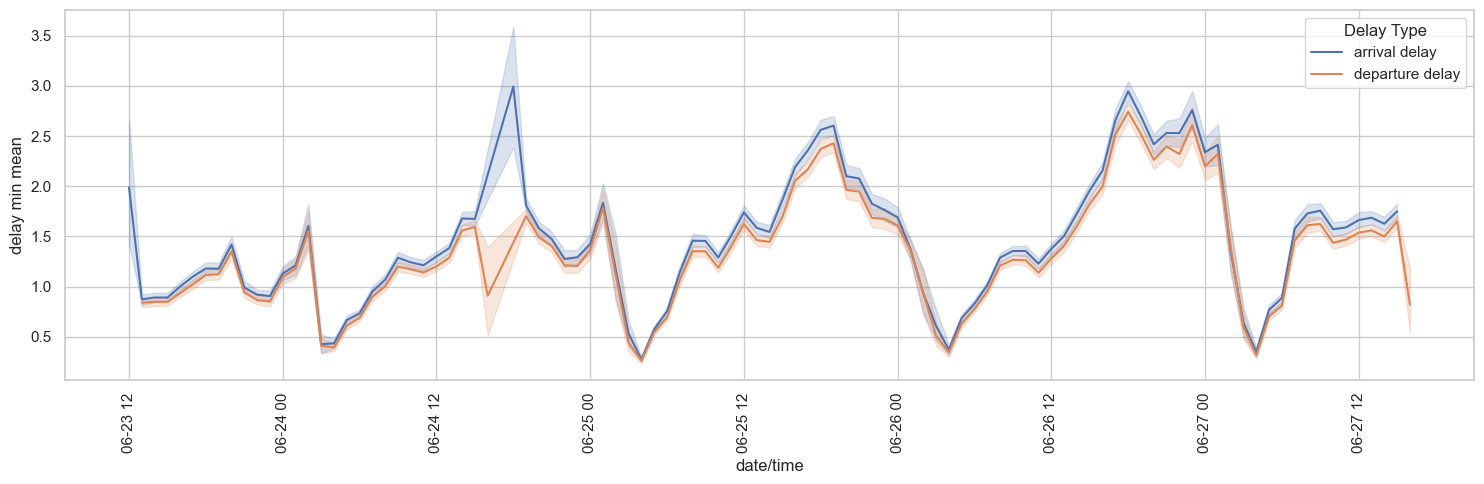

In [95]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.lineplot(df_temp_arr, x="arrival_plan_datetime", y="arrival_delay_m", label="arrival delay", ax=ax)
sns.lineplot(df_temp_dep, x="departure_plan_datetime", y="departure_delay_m", label="departure delay", ax=ax)

ax.set_xlabel("date/time")
ax.set_ylabel("delay min mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="Delay Type")

plt.tight_layout()
plt.show()

the data indicates a seasonality with peaks around late afternoon around 16:00.<br>
the gap on the 24th comes from a gap in the data collection around that time

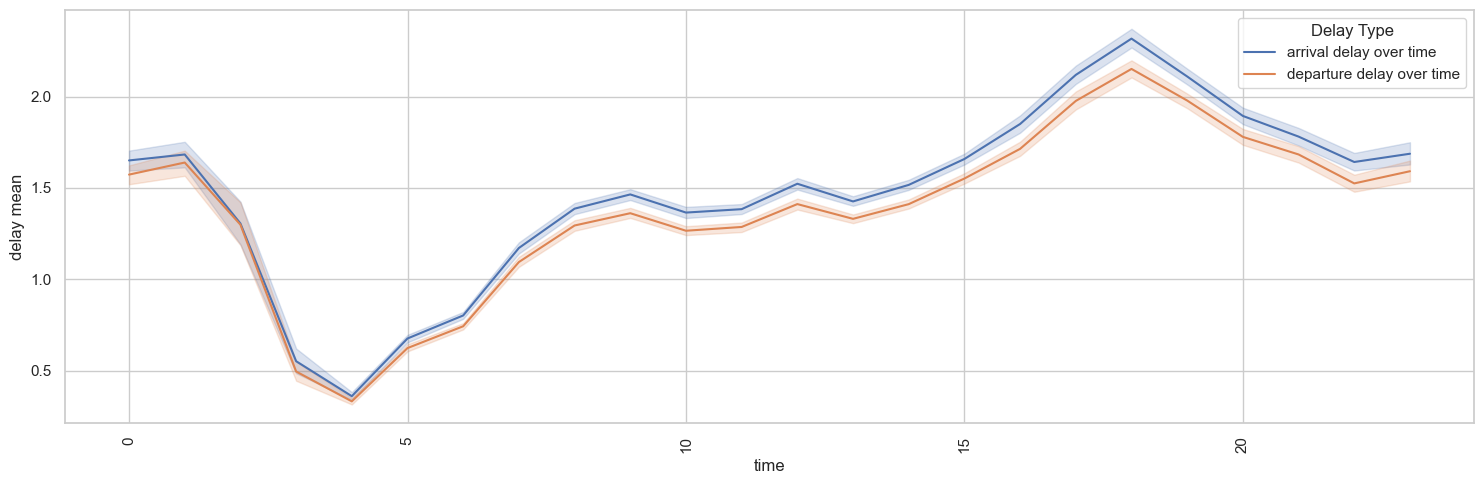

In [94]:
# Create a single figure and axes
fig, ax = plt.subplots(figsize=(15, 5))


sns.lineplot(df_temp_arr, x="arrival_plan_hour", y="arrival_delay_m", ax=ax, label="arrival delay over time")
sns.lineplot(df_temp_dep, x="departure_plan_hour", y="departure_delay_m", ax=ax, label="departure delay over time")

ax.set_xlabel("time")
ax.set_ylabel("delay mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="Delay Type")

plt.tight_layout()
plt.show()

as arrival and departure follow a similar temporal pattern, we will only discuss arrival going further

In [90]:
df_temp_cat = df_temp_arr.groupby(["arrival_plan_datetime", "category"], as_index=False).arrival_delay_m.mean()

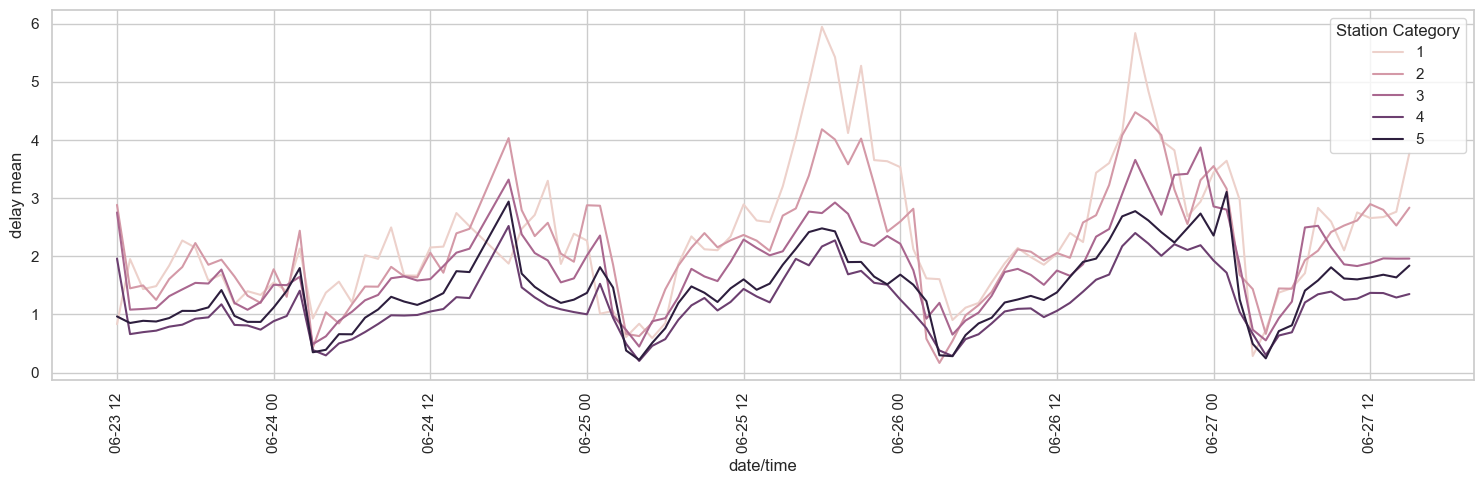

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df_temp_cat, x="arrival_plan_datetime", y="arrival_delay_m", ax=ax, hue="category")

ax.set_xlabel("date/time")
ax.set_ylabel("delay mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="Station Category")

plt.tight_layout()
plt.show()

In [106]:
df_temp_cat2 = df_temp_arr.groupby(["arrival_plan_hour", "category"], as_index=False).arrival_delay_m.mean()

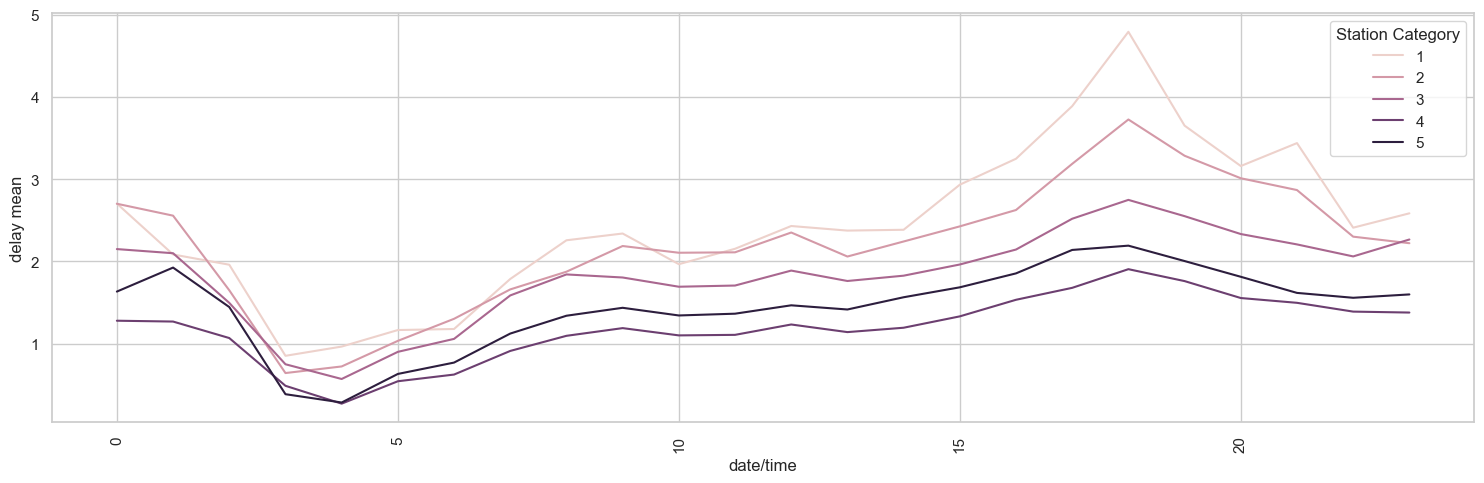

In [107]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df_temp_cat2, x="arrival_plan_hour", y="arrival_delay_m", ax=ax, hue="category")

ax.set_xlabel("date/time")
ax.set_ylabel("delay mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="Station Category")

plt.tight_layout()
plt.show()

All station types follow a similar pattern,  while the mean of the delay increases the lower the category (more delay on main junctions)

In [109]:
df_temp_state = df_temp_arr.groupby(["arrival_plan_datetime", "state"], as_index=False).arrival_delay_m.mean()

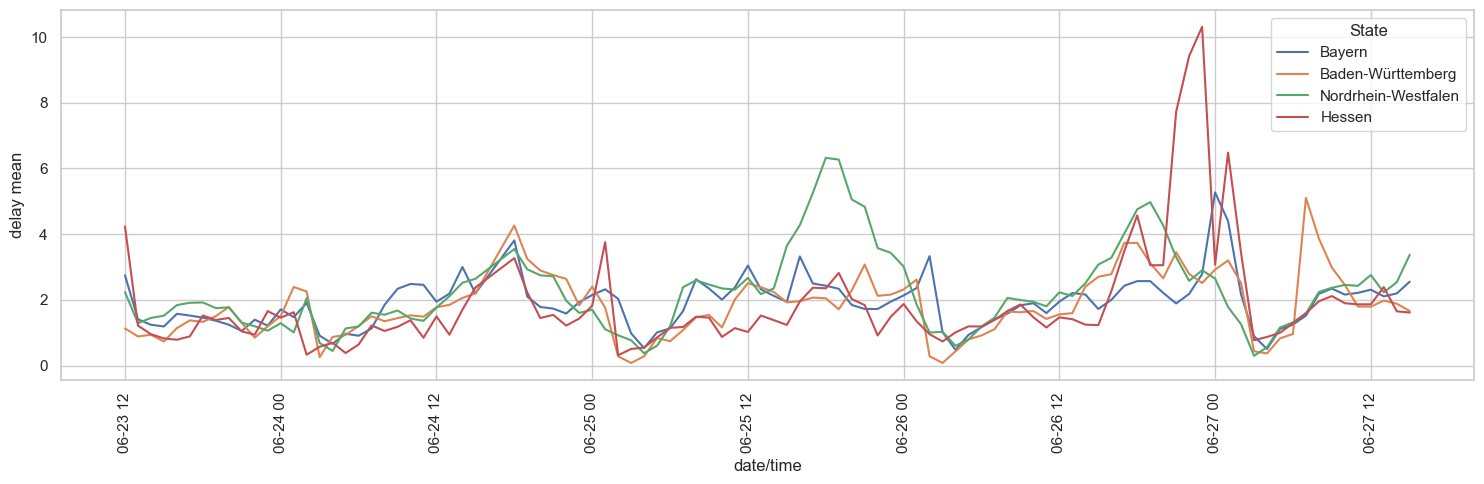

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df_temp_state[df_temp_state["state"] == "Bayern"], label="Bayern", x="arrival_plan_datetime", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state[df_temp_state["state"] == "Baden-Württemberg"], label="Baden-Württemberg", x="arrival_plan_datetime", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state[df_temp_state["state"] == "Nordrhein-Westfalen"], label="Nordrhein-Westfalen", x="arrival_plan_datetime", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state[df_temp_state["state"] == "Hessen"], label="Hessen", x="arrival_plan_datetime", y="arrival_delay_m", ax=ax)

ax.set_xlabel("date/time")
ax.set_ylabel("delay mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="State")

plt.tight_layout()
plt.show()

In [110]:
df_temp_state2 = df_temp_arr.groupby(["arrival_plan_hour", "state"], as_index=False).arrival_delay_m.mean()

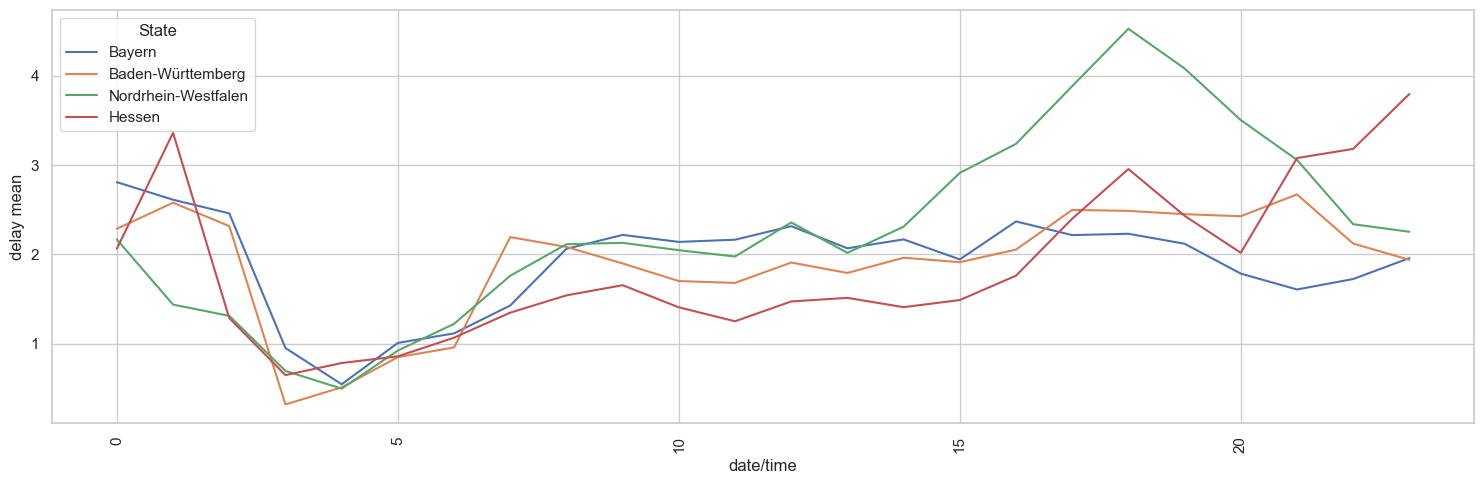

In [111]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(df_temp_state2[df_temp_state2["state"] == "Bayern"], label="Bayern", x="arrival_plan_hour", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state2[df_temp_state2["state"] == "Baden-Württemberg"], label="Baden-Württemberg", x="arrival_plan_hour", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state2[df_temp_state2["state"] == "Nordrhein-Westfalen"], label="Nordrhein-Westfalen", x="arrival_plan_hour", y="arrival_delay_m", ax=ax)
sns.lineplot(df_temp_state2[df_temp_state2["state"] == "Hessen"], label="Hessen", x="arrival_plan_hour", y="arrival_delay_m", ax=ax)

ax.set_xlabel("date/time")
ax.set_ylabel("delay mean")
ax.tick_params(axis='x', rotation=90)
ax.legend(title="State")

plt.tight_layout()
plt.show()

# Geographical analysis
## Heatmap

In [8]:
heatmap_df = df.groupby("name", as_index=False ).mean(numeric_only=True)

In [9]:
fig = px.density_mapbox(heatmap_df,
                        lat='lat', lon='long', z='arrival_delay_m',
                        hover_name='name',
                        radius=10,
                        center=dict(lat=0, lon=180), zoom=10,
                        range_color=[0, heatmap_df.arrival_delay_m.max()]
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
    mapbox_zoom=5,
    width=700,
    height=800
)


In [10]:
fig = px.density_mapbox(heatmap_df,
                        lat='lat', lon='long', z='departure_delay_m',
                        hover_name='name',
                        radius=10,
                        center=dict(lat=0, lon=180), zoom=10,
                        range_color=[0, heatmap_df.arrival_delay_m.max()]
)
fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": 51.1657, "lon": 10.4515},  # Centered on Germany
    mapbox_zoom=5,
    width=700,
    height=800
)
fig.show()

# Creating columns for arrival and departure analysis

In [11]:
df_state_count_delay = df[df["arrival_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count_delay.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,12845,12845,12845,12845,12845,12845,12845,12845,12845,...,12845,12845,12845,12812,12845,12845,12845,12845,12845,12845
1,Bayern,13662,13662,13662,13662,13662,13662,13662,13662,13662,...,13662,13662,13662,13647,13662,13662,13662,13662,13662,13662
2,Berlin,2944,2944,2944,2944,2944,2944,2944,2944,2944,...,2944,2944,2944,2938,2944,2944,2944,2944,2944,2944
3,Brandenburg,1139,1139,1139,1139,1139,1139,1139,1139,1139,...,1139,1139,1139,1138,1139,1139,1139,1139,1139,1139
4,Bremen,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [12]:
df_state_count_delay2 = df[df["departure_delay_check"] == "delay"].groupby("state", as_index=False).count()
df_state_count_delay.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,12845,12845,12845,12845,12845,12845,12845,12845,12845,...,12845,12845,12845,12812,12845,12845,12845,12845,12845,12845
1,Bayern,13662,13662,13662,13662,13662,13662,13662,13662,13662,...,13662,13662,13662,13647,13662,13662,13662,13662,13662,13662
2,Berlin,2944,2944,2944,2944,2944,2944,2944,2944,2944,...,2944,2944,2944,2938,2944,2944,2944,2944,2944,2944
3,Brandenburg,1139,1139,1139,1139,1139,1139,1139,1139,1139,...,1139,1139,1139,1138,1139,1139,1139,1139,1139,1139
4,Bremen,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147


In [13]:
df_state_count = df.groupby("state", as_index=False).count()
df_state_count.head()

,state,ID,train,path,eva_nr,category,name,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Baden-Württemberg,153345,153345,134058,153345,153345,153345,153345,153345,153345,...,134058,153345,121927,135830,153345,153345,153345,153345,134058,134058
1,Bayern,191009,191009,171876,191009,191009,191009,191009,191009,191009,...,171876,191009,161276,175345,191009,191009,191009,191009,171876,171876
2,Berlin,197424,197424,190326,197424,197424,197424,197424,197424,197424,...,190326,197424,148070,148021,197424,197424,197424,197424,190326,190326
3,Brandenburg,34283,34283,28108,34283,34283,34283,34283,34283,34283,...,28108,34283,24098,26895,34283,34283,34283,34283,28108,28108
4,Bremen,6123,6123,4872,6123,6123,6123,6123,6123,6123,...,4872,6123,1898,2802,6123,6123,6123,6123,4872,4872


In [14]:
df_state_sum = df.groupby("state", as_index=False).sum("arrival_delay_m")
df_state_sum.head()


,state,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m
0,Baden-Württemberg,1227253967592,581551,11322875767,1.372832e+06,7.474085e+06,260803,279989
1,Bayern,1528683476058,727114,16273705242,2.169454e+06,9.265278e+06,332462,338971
2,Berlin,1595825232386,778979,2345782364,2.644583e+06,1.036573e+07,79026,79332
3,Brandenburg,275490967347,141992,476458952,4.605306e+05,1.796195e+06,26040,29052
4,Bremen,48989269648,24729,173521847,5.349559e+04,3.255924e+05,2860,2988


## Merging Dataframes

In [15]:
#merging
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay[["state","arrival_delay_check"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [16]:
df_state = df_state[[
    'state', 
    #'eva_nr', 'category', 'zip', 'long', 'lat', 
    'arrival_delay_m',
    'departure_delay_m', 'arrival_plan', 'departure_plan',
    'arrival_delay_check', 'departure_delay_check',
    ]]

In [17]:
df_state.head()

,state,arrival_delay_m,departure_delay_m,arrival_plan,departure_plan,arrival_delay_check,departure_delay_check
0,Baden-Württemberg,260803,279989,134058,153345,12845,13442
1,Bayern,332462,338971,171876,191009,13662,13268
2,Berlin,79026,79332,190326,197424,2944,2887
3,Brandenburg,26040,29052,28108,34283,1139,1192
4,Bremen,2860,2988,4872,6123,147,128


## Calculating new rows

In [18]:
df_state["arrival_plan%"] = (df_state["arrival_plan"] / df_state["arrival_plan"].sum()) * 100
df_state["arr_delay_amount_%"] = (df_state["arrival_delay_m"] / df_state["arrival_delay_m"].sum()) * 100
df_state["delay/arrival"] = (df_state["arrival_delay_m"] / df_state["arrival_plan"])
df_state["delay_cnt/arrival"] = (df_state["arrival_delay_check"] / df_state["arrival_plan"]) *100

In [19]:
df_state["departure_plan%"] = (df_state["departure_plan"] / df_state["departure_plan"].sum()) * 100
df_state["dep_delay_amount_%"] = (df_state["departure_delay_m"] / df_state["departure_delay_m"].sum()) * 100
df_state["delay/departure"] = (df_state["departure_delay_m"] / df_state["departure_plan"])
df_state["delay_cnt/departure"] = (df_state["departure_delay_check"] / df_state["departure_plan"]) *100

In [20]:
df_state.head()

,state,arrival_delay_m,departure_delay_m,arrival_plan,departure_plan,arrival_delay_check,departure_delay_check,arrival_plan%,arr_delay_amount_%,delay/arrival,delay_cnt/arrival,departure_plan%,dep_delay_amount_%,delay/departure,delay_cnt/departure
0,Baden-Württemberg,260803,279989,134058,153345,12845,13442,12.355246,15.807574,1.945449,9.581674,12.671297,16.317088,1.825876,8.765855
1,Bayern,332462,338971,171876,191009,13662,13268,15.840683,20.150910,1.934313,7.948754,15.783572,19.754418,1.774634,6.946270
2,Berlin,79026,79332,190326,197424,2944,2887,17.541098,4.789858,0.415214,1.546820,16.313660,4.623279,0.401836,1.462335
3,Brandenburg,26040,29052,28108,34283,1139,1192,2.590530,1.578315,0.926427,4.052227,2.832894,1.693081,0.847417,3.476942
4,Bremen,2860,2988,4872,6123,147,128,0.449020,0.173348,0.587028,3.017241,0.505959,0.174133,0.487996,2.090479


# Side by Side comparison

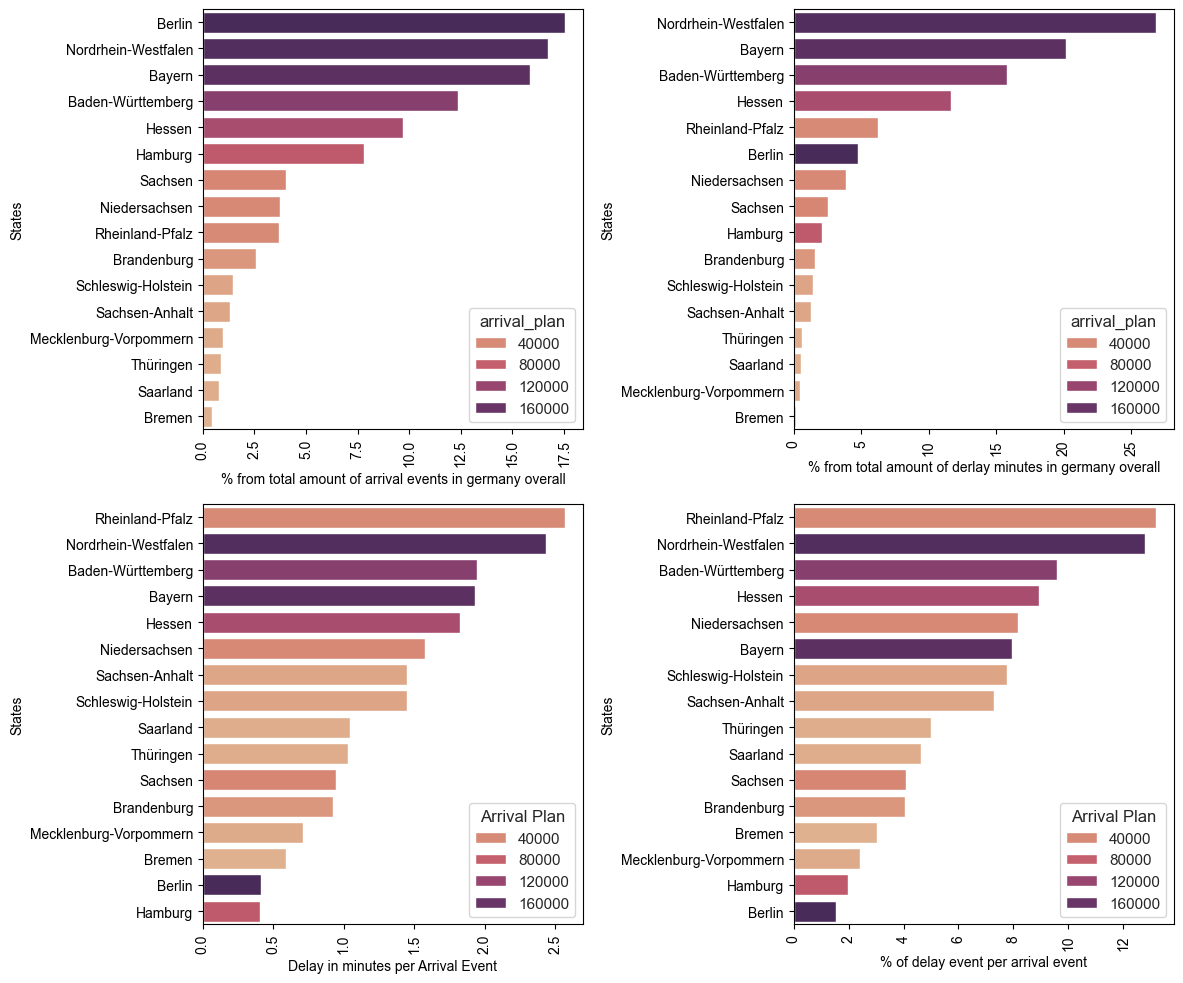

In [21]:
# Define the figure and the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 1 row, 3 columns, each plot with a size of 8x6 inches

# Set the theme for all plots
sns.set_theme(style="whitegrid")

# First bar plot
sns.barplot(data=df_state.sort_values(by="arrival_plan%", ascending=False), x="arrival_plan%", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[0,0])
axes[0,0].set_xlabel("% from total amount of arrival events in germany overall")
axes[0,0].set_ylabel("States")
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].legend(title="arrival_plan")

# Second bar plot
sns.barplot(data=df_state.sort_values(by="arr_delay_amount_%", ascending=False), x="arr_delay_amount_%", y="state", 
            palette="flare", hue="arrival_plan", orient="h", ax=axes[0,1])
axes[0,1].set_xlabel("% from total amount of derlay minutes in germany overall")
axes[0,1].set_ylabel("States")
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].legend(title="arrival_plan")

# Third bar plot
sns.barplot(data=df_state.sort_values(by="delay/arrival", ascending=False), y="state", x="delay/arrival", 
            palette="flare", orient="h", hue="arrival_plan", ax=axes[1,0])
axes[1,0].set_xlabel("Delay in minutes per Arrival Event")
axes[1,0].set_ylabel("States")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].legend(title="Arrival Plan")

sns.barplot(data=df_state.sort_values(by="delay_cnt/arrival", ascending=False), y="state", x="delay_cnt/arrival", 
            palette="flare", orient="h", hue="arrival_plan", ax=axes[1,1])
axes[1,1].set_xlabel("% of delay event per arrival event")
axes[1,1].set_ylabel("States")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(title="Arrival Plan")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

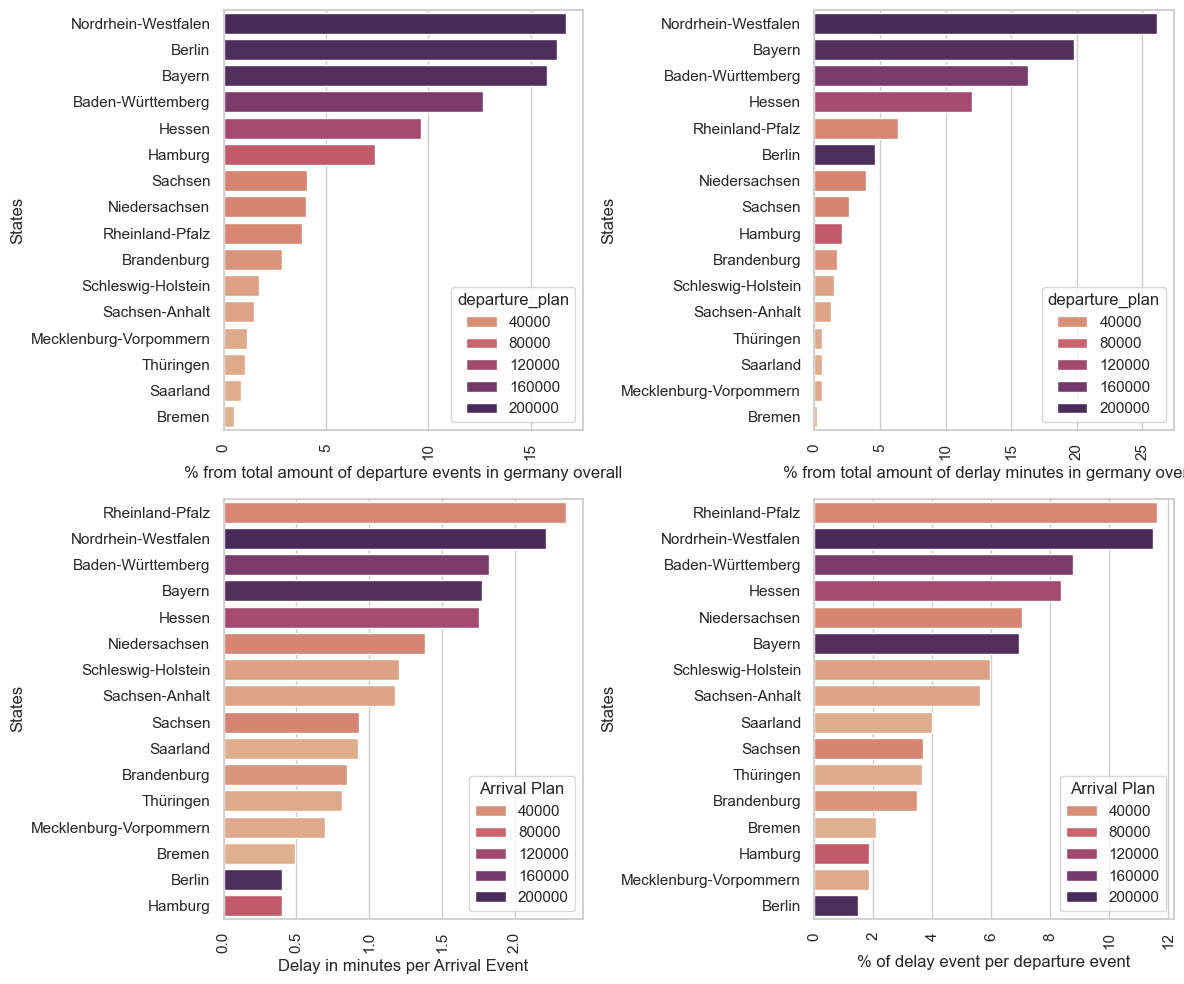

In [22]:
# Define the figure and the subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 1 row, 3 columns, each plot with a size of 8x6 inches

# Set the theme for all plots
sns.set_theme(style="whitegrid")

# First bar plot
sns.barplot(data=df_state.sort_values(by="departure_plan%", ascending=False), x="departure_plan%", y="state", 
            palette="flare", hue="departure_plan", orient="h", ax=axes[0,0])
axes[0,0].set_xlabel("% from total amount of departure events in germany overall")
axes[0,0].set_ylabel("States")
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,0].legend(title="departure_plan")

# Second bar plot
sns.barplot(data=df_state.sort_values(by="dep_delay_amount_%", ascending=False), x="dep_delay_amount_%", y="state", 
            palette="flare", hue="departure_plan", orient="h", ax=axes[0,1])
axes[0,1].set_xlabel("% from total amount of derlay minutes in germany overall")
axes[0,1].set_ylabel("States")
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,1].legend(title="departure_plan")

# Third bar plot
sns.barplot(data=df_state.sort_values(by="delay/departure", ascending=False), y="state", x="delay/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1,0])
axes[1,0].set_xlabel("Delay in minutes per Arrival Event")
axes[1,0].set_ylabel("States")
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,0].legend(title="Arrival Plan")

sns.barplot(data=df_state.sort_values(by="delay_cnt/departure", ascending=False), y="state", x="delay_cnt/departure", 
            palette="flare", orient="h", hue="departure_plan", ax=axes[1,1])
axes[1,1].set_xlabel("% of delay event per departure event")
axes[1,1].set_ylabel("States")
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,1].legend(title="Arrival Plan")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

NRW; BW, Bayern and Hessen have the highest ratio of delay time to arrival events and are therefore the prime suspects for in depth analysis.
<br>While Rheinland-Pfalz and Niedersachsen also have a high ratio, they are in the lower parts for total amounts of arrival events and therefore not as important to prioritize.

# Details for the most important States
### NRW, BW, Bayern, Hessen

In [113]:
# Creating df for the single states
df_nrw = df[df["state"] == "Nordrhein-Westfalen"]
df_bw = df[df["state"] == "Baden-Württemberg"]
df_bay = df[df["state"] == "Bayern"]
df_hes = df[df["state"] == "Hessen"]

df_states_list = {"nrw" : df_nrw, "bw" : df_bw, "bay" : df_bay, "hes" : df_hes}

### recreating the Measurements above for the different states to have a look at problematic cities

#### Arrival delay check

In [133]:
for state in df_states_list:
    df_city_count_delay_ = df_nrw[df_nrw["arrival_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_nrw.head()

# count delay for BW
df_city_count_delay_bw = df_bw[df_bw["arrival_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_bw.head()

# count delay for Bayern
df_city_count_delay_bay = df_bay[df_bay["arrival_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_bay.sort_values(by="arrival_delay_m", ascending=False)

# count delay for Hessen
df_city_count_delay_hes = df_hes[df_hes["arrival_delay_check"] == "delay"].groupby("city", as_index=False).count()
df_city_count_delay_hes.head()

,city,ID,train,path,eva_nr,category,name,state,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Alsbach-Hähnlein,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1,Alsfeld,9,8,9,9,9,9,9,9,9,...,9,8,9,8,9,9,9,9,9,9
2,Babenhausen,97,96,97,97,97,97,97,97,97,...,97,96,97,96,97,97,97,97,97,97
3,Bad Camberg,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
4,Bad Hersfeld,48,13,48,48,48,48,48,48,48,...,48,44,48,44,48,48,48,48,48,48


#### Departure delay check

In [134]:
# Departure delay
# count delay for NRW
df_city_count_delay_nrw2 = df_nrw[df_nrw["departure_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_nrw2.head()

# count delay for BW
df_city_count_delay_bw2 = df_bw[df_bw["departure_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_bw2.head()

# count delay for Bayern
df_city_count_delay_bay2 = df_bay[df_bay["departure_delay_check"] == "delay"].groupby("city", as_index=False).count()
#df_city_count_delay_bay2.sort_values(by="arrival_delay_m", ascending=False)

# count delay for Hessen
df_city_count_delay_hes2 = df_hes[df_hes["departure_delay_check"] == "delay"].groupby("city", as_index=False).count()
df_city_count_delay_hes2.head()

,city,ID,train,path,eva_nr,category,name,state,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Alsbach-Hähnlein,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
1,Alsfeld,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,Babenhausen,76,76,76,76,76,76,76,76,76,...,76,76,76,76,76,76,76,76,76,76
3,Bad Camberg,17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,Bad Hersfeld,44,14,43,44,44,44,44,44,44,...,43,44,43,44,44,44,44,44,43,43


#### Count the trains for cities

In [147]:
df_city_count_nrw = df_nrw.groupby("city", as_index=False).count()
#df_city_count_nrw.head()

df_city_count_bw = df_bw.groupby("city", as_index=False).count()
#df_city_count_bw.head()

df_city_count_bay = df_bay.groupby("city", as_index=False).count()
#df_city_count_bay.head()

df_city_count_hes = df_hes.groupby("city", as_index=False).count()
#df_city_count_hes.head()

In [139]:
df_city_count = df.groupby("city", as_index=False).count()
df_city_count.head()

,city,ID,train,path,eva_nr,category,name,state,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,Dresden,158,158,158,158,158,158,158,158,158,...,158,158,145,145,158,158,158,158,158,158
1,Freinsheim,478,370,364,478,478,478,478,478,478,...,364,370,354,308,478,478,478,478,364,364
2,Nürnberg,425,425,425,425,425,425,425,425,425,...,425,425,425,425,425,425,425,425,425,425
3,Pforzheim,316,316,316,316,316,316,316,316,316,...,316,316,315,315,316,316,316,316,316,316
4,Remchingen,350,288,284,350,350,350,350,350,350,...,284,288,278,280,350,350,350,350,284,284


In [136]:
df_city_sum = df.groupby("city", as_index=False).sum("arrival_delay_m")
df_city_sum.head()

,city,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m
0,Dresden,1266129050,790,168586,2165.887858,8066.853372,179,175
1,Freinsheim,3824178772,1912,32145978,3922.081776,23661.713654,377,247
2,Nürnberg,3400845325,2125,38451875,4748.979750,21000.669500,369,533
3,Pforzheim,2528613672,1580,23757196,2763.031952,15455.511336,437,437
4,Remchingen,2802254000,1750,26318600,3000.345250,17133.851700,478,415


In [137]:
#merging NRW
df_nrw_city = pd.merge(df_city_sum, df_city_count[["city","arrival_plan","departure_plan"]], how='left', on="city", suffixes=('', '_count'))
df_nrw_city = pd.merge(df_nrw_city, df_city_count_delay_nrw[["city","arrival_delay_check"]], how='left', on="city", suffixes=('', '_count'))
df_nrw_city = pd.merge(df_nrw_city, df_city_count_delay_nrw2[["city","departure_delay_check"]], how='left', on="city", suffixes=('', '_count'))


,city,eva_nr,category,zip,long,lat,arrival_delay_m,departure_delay_m,arrival_plan,departure_plan,arrival_delay_check,departure_delay_check
0,Dresden,1266129050,790,168586,2165.887858,8066.853372,179,175,158,158,NaN,NaN
1,Freinsheim,3824178772,1912,32145978,3922.081776,23661.713654,377,247,364,370,NaN,NaN
2,Nürnberg,3400845325,2125,38451875,4748.979750,21000.669500,369,533,425,425,NaN,NaN
3,Pforzheim,2528613672,1580,23757196,2763.031952,15455.511336,437,437,316,316,NaN,NaN
4,Remchingen,2802254000,1750,26318600,3000.345250,17133.851700,478,415,284,288,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1287,Züssow,2675472264,1670,5843330,4525.095794,18027.275586,334,355,258,258,NaN,NaN
1288,Öhringen,3698135826,2310,34471206,4390.249710,22731.884868,694,651,453,453,NaN,NaN
1289,Ötigheim,2417400072,1208,23093940,2488.655764,14764.334852,348,340,302,302,NaN,NaN
1290,Übach-Palenberg,3602670750,2250,23638950,2743.769250,22915.951200,2443,2404,450,450,114.0,111.0


In [ ]:
#merging BW
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay[["state","arrival_delay_check"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [ ]:
#merging Bayern
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay[["state","arrival_delay_check"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

In [ ]:
#merging Hessen
df_state = pd.merge(df_state_sum, df_state_count[["state","arrival_plan","departure_plan"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay[["state","arrival_delay_check"]], how='left', on="state", suffixes=('', '_count'))
df_state = pd.merge(df_state, df_state_count_delay2[["state","departure_delay_check"]], how='left', on="state", suffixes=('', '_count'))

## 1) NRW

In [123]:
#NRW
df_nrw.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
0,4083473720689476753-2406231250-4,20,Stolberg(Rheinl)Hbf|Eilendorf|Aachen-Rothe Erde,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:01:00,2024-06-23 13:02:00,2024-06-23 13:03:00,2024-06-23 13:04:00,2,2,on_time,on_time,13:01:00,2024-06-23
1,-8892239479013746475-2406231212-14,20,Stolberg(Rheinl)Hbf Gl.44|Eschweiler-St.Jöris|...,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,2024-06-23 13:00:00,2024-06-23 13:01:00,2024-06-23 13:05:00,2024-06-23 13:06:00,5,5,on_time,on_time,13:00:00,2024-06-23
2,3772983581833112391-2406231337-1,33,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:37:00,NaT,NaT,0,0,on_time,on_time,NaT,NaT
3,-7760689325071259199-2406231337-1,29,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:37:00,NaT,NaT,0,0,on_time,on_time,NaT,NaT
4,3762663024269879642-2406231318-1,9,NaN,8000001,2,Aachen Hbf,Nordrhein-Westfalen,Aachen,52064,6.091499,...,NaT,2024-06-23 13:18:00,NaT,2024-06-23 13:18:00,0,0,on_time,on_time,NaT,NaT


In [124]:
df_nrw.columns

Index(['ID', 'train', 'path', 'eva_nr', 'category', 'name', 'state', 'city',
       'zip', 'long', 'lat', 'arrival_plan', 'departure_plan',
       'arrival_change', 'departure_change', 'arrival_delay_m',
       'departure_delay_m', 'arrival_delay_check', 'departure_delay_check',
       'arrival_plan_time', 'arrival_plan_date'],
      dtype='object')

In [ ]:
df_nrw

## 2) Baden-Württemberg

In [127]:
df_bw.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
32,-6126868320491689649-2406231307-1,13,NaN,8000002,3,Aalen Hbf,Baden-Württemberg,Aalen,73430,10.096271,...,NaT,2024-06-23 13:07:00,NaT,2024-06-23 13:07:00,0,0,on_time,on_time,NaT,NaT
33,272415074964871639-2406231211-15,NaN,Ulm Hbf|Thalfingen(b Ulm)|Langenau(Württ)|Nied...,8000002,3,Aalen Hbf,Baden-Württemberg,Aalen,73430,10.096271,...,2024-06-23 13:24:00,NaT,2024-06-23 13:24:00,NaT,0,0,on_time,on_time,13:24:00,2024-06-23
34,3176708709638487520-2406231307-1,50,NaN,8000002,3,Aalen Hbf,Baden-Württemberg,Aalen,73430,10.096271,...,NaT,2024-06-23 13:07:00,NaT,2024-06-23 13:07:00,0,0,on_time,on_time,NaT,NaT
35,-6541600476634923326-2406231212-15,NaN,Donauwörth|Wörnitzstein|Harburg(Schwab)|Hoppin...,8000002,3,Aalen Hbf,Baden-Württemberg,Aalen,73430,10.096271,...,2024-06-23 13:24:00,NaT,2024-06-23 13:24:00,NaT,0,0,on_time,on_time,13:24:00,2024-06-23
36,-1719968934147060402-2406231220-12,13,Stuttgart Hbf|Stuttgart-Bad Cannstatt|Waibling...,8000002,3,Aalen Hbf,Baden-Württemberg,Aalen,73430,10.096271,...,2024-06-23 13:20:00,2024-06-23 13:28:00,2024-06-23 13:20:00,2024-06-23 13:28:00,0,0,on_time,on_time,13:20:00,2024-06-23


## 3) Bayern

In [102]:
df_bay.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
73,6850338856821708765-2406231246-7,RB13,Augsburg Hbf|Augsburg Haunstetterstraße|Augsbu...,8000452,5,Aichach,Bayern,Aichach,86551,11.122721,...,2024-06-23 13:11:00,2024-06-23 13:12:00,2024-06-23 13:13:00,2024-06-23 13:14:00,2,2,on_time,on_time,13:11:00,2024-06-23
74,1376257638137654876-2406231308-5,RB13,Ingolstadt Hbf|Brunnen(Oberbay)|Schrobenhausen...,8000452,5,Aichach,Bayern,Aichach,86551,11.122721,...,2024-06-23 13:39:00,2024-06-23 13:43:00,2024-06-23 13:39:00,2024-06-23 13:43:00,0,0,on_time,on_time,13:39:00,2024-06-23
166,-223937227140493395-2406231257-5,87,München Hbf|München-Pasing|Mammendorf|Haspelmoor,8000545,5,Althegnenberg,Bayern,Althegnenberg,82278,11.063003,...,2024-06-23 13:24:00,2024-06-23 13:25:00,2024-06-23 13:24:00,2024-06-23 13:25:00,0,0,on_time,on_time,13:24:00,2024-06-23
167,6295691254714231535-2406231220-18,87,Donauwörth|Bäumenheim|Mertingen Bahnhof|Norden...,8000545,5,Althegnenberg,Bayern,Althegnenberg,82278,11.063003,...,2024-06-23 13:28:00,2024-06-23 13:29:00,2024-06-23 13:28:00,2024-06-23 13:29:00,0,0,on_time,on_time,13:28:00,2024-06-23
173,-5710867456441415644-2406231235-5,40,Regensburg Hbf|Regenstauf|Maxhütte-Haidhof|Sch...,8000566,5,Amberg,Bayern,Amberg,92224,11.862902,...,2024-06-23 13:21:00,2024-06-23 13:22:00,2024-06-23 13:21:00,2024-06-23 13:23:00,0,1,on_time,on_time,13:21:00,2024-06-23


## 4) Hessen

In [104]:
df_hes.head()

,ID,train,path,eva_nr,category,name,state,city,zip,long,...,arrival_plan,departure_plan,arrival_change,departure_change,arrival_delay_m,departure_delay_m,arrival_delay_check,departure_delay_check,arrival_plan_time,arrival_plan_date
101,755701994507760594-2406231233-7,RB45,Fulda|Oberbimbach|Großenlüder|Bad Salzschlirf|...,8000350,5,Alsfeld (Oberhess),Hessen,Alsfeld,36304,9.264297,...,2024-06-23 13:18:00,2024-06-23 13:19:00,2024-06-23 13:18:00,2024-06-23 13:19:00,0,0,on_time,on_time,13:18:00,2024-06-23
102,2729281053064951751-2406231123-31,RB45,Limburg(Lahn)|Eschhofen|Kerkerbach|Runkel|Vill...,8000350,5,Alsfeld (Oberhess),Hessen,Alsfeld,36304,9.264297,...,2024-06-23 13:48:00,2024-06-23 13:50:00,2024-06-23 13:48:00,2024-06-23 13:50:00,0,0,on_time,on_time,13:48:00,2024-06-23
284,-4583956337485204414-2406231153-14,RB10,Frankfurt(Main)Hbf|Frankfurt-Höchst|Mainz-Kast...,8000635,5,Assmannshausen,Hessen,Rüdesheim am Rhein,65385,7.867355,...,2024-06-23 13:10:00,2024-06-23 13:10:00,2024-06-23 13:10:00,2024-06-23 13:10:00,0,0,on_time,on_time,13:10:00,2024-06-23
285,2770059313740740081-2406231223-14,NaN,Frankfurt(Main)Hbf|Frankfurt-Höchst|Mainz-Kast...,8000635,5,Assmannshausen,Hessen,Rüdesheim am Rhein,65385,7.867355,...,2024-06-23 13:40:00,NaT,2024-06-23 13:40:00,NaT,0,0,on_time,on_time,13:40:00,2024-06-23
286,8076416162476703078-2406231318-1,RB10,NaN,8000635,5,Assmannshausen,Hessen,Rüdesheim am Rhein,65385,7.867355,...,NaT,2024-06-23 13:18:00,NaT,NaT,0,0,on_time,on_time,NaT,NaT
